<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/ACM-work/blob/main/titanic(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
##Exploring the data
print(train.info())
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Checking the data types of each column
print(train.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Checking missing values in the train dataset
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Fill missing values for 'Age' with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


<ipython-input-11-2707514f2cb5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-11-2707514f2cb5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Checking unique values in the 'Embarked' column
print(train['Embarked'].unique())

['S' 'C' 'Q']


In [ ]:
# Fill missing values for 'Embarked' with the most frequent value (mode)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

<ipython-input-12-a010fca0a351>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [ ]:
# Drop the columns 'Name', 'PassengerId', and 'Fare' from the train and test datasets
train.drop(['Name', 'PassengerId', 'Fare'], axis=1, inplace=True)
test.drop(['Name', 'PassengerId', 'Fare'], axis=1, inplace=True)

In [ ]:
## handling the missing values in the cabin column since it can effect the survival rate
# Extracting  the first letter of the 'Cabin' to represent the deck (if the 'Cabin' value exists)
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]
# Filling the  missing 'Cabin' values with the most frequent deck (mode)
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)
# Verifying  if there are still missing values in 'Cabin'
print(train['Cabin'].isnull().sum())
print(test['Cabin'].isnull().sum())
# Checking the first few rows of the data to confirm changes
print(train.head())
print(test.head())


0
0
   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket Cabin  \
0         0       3    male  22.0      1      0         A/5 21171     C   
1         1       1  female  38.0      1      0          PC 17599     C   
2         1       3  female  26.0      0      0  STON/O2. 3101282     C   
3         1       1  female  35.0      1      0            113803     C   
4         0       3    male  35.0      0      0            373450     C   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
   Pclass     Sex   Age  SibSp  Parch   Ticket Cabin Embarked
0       3    male  34.5      0      0   330911     C        Q
1       3  female  47.0      1      0   363272     C        S
2       2    male  62.0      0      0   240276     C        Q
3       3    male  27.0      0      0   315154     C        S
4       3  female  22.0      1      1  3101298     C        S


<ipython-input-15-96e5159856e2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
<ipython-input-15-96e5159856e2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
#  Label Encoding for binary columns like 'Sex'
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Check the columns in the train and test DataFrames
print(train.columns)
print(test.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Embarked_Q', 'Embarked_S', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked_Q',
       'Embarked_S', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'SibSp', 'Parch']
# Creating a StandardScaler object
scaler = StandardScaler()
# Fit and transform the scaler on the train data, then transform the test data
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])
# Check the scaled data
print(train.head())
print(test.head())
## applied Standardization (Z-score scaling)


   Survived  Pclass  Sex       Age     SibSp     Parch            Ticket  \
0         0       3    0 -0.565736  0.432793 -0.473674         A/5 21171   
1         1       1    1  0.663861  0.432793 -0.473674          PC 17599   
2         1       3    1 -0.258337 -0.474545 -0.473674  STON/O2. 3101282   
3         1       1    1  0.433312  0.432793 -0.473674            113803   
4         0       3    0  0.433312 -0.474545 -0.473674            373450   

   Embarked_Q  Embarked_S  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
0       False        True    False     True    False    False    False   
1       False       False    False     True    False    False    False   
2       False        True    False     True    False    False    False   
3       False        True    False     True    False    False    False   
4       False        True    False     True    False    False    False   

   Cabin_G  Cabin_T  
0    False    False  
1    False    False  
2    False    False  
3    False

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Separate features (X) and target (y) from the train data
X_train = train.drop('Survived', axis=1)  # Features
y_train = train['Survived']              # Target

In [ ]:
X_test = test  # Features for test (no 'Survived' in the test set)

In [ ]:
#  Split the train data into training and validation sets (80-20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
logreg.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict on the validation set
y_pred_val = logreg.predict(X_val_split)

In [ ]:
 #Evaluate the model on validation data
accuracy = accuracy_score(y_val_split, y_pred_val)
print(f'Accuracy on validation set: {accuracy * 100:.2f}%')

Accuracy on validation set: 81.56%


In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val_split, y_pred_val))

# Classification Report
print("Classification Report:")
print(classification_report(y_val_split, y_pred_val))

# Step 5: Predict on the test set
y_pred_test = logreg.predict(X_test)

Confusion Matrix:
[[89 16]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Cabin_T


In [ ]:
# Ensure the columns in the test set match the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
# Now you can predict on the test set
y_pred_test = logreg.predict(X_test)




In [ ]:
##Confusion Matrix:
[[89 16]
 [17 57]]





Correlation Matrix:
              Pclass       Sex       Age     SibSp     Parch  Embarked_Q  \
Pclass      1.000000 -0.128672 -0.329710  0.086933  0.012679    0.203688   
Sex        -0.128672  1.000000 -0.079491  0.104174  0.250724    0.046336   
Age        -0.329710 -0.079491  1.000000 -0.237681 -0.189412   -0.040158   
SibSp       0.086933  0.104174 -0.237681  1.000000  0.440355   -0.009471   
Parch       0.012679  0.250724 -0.189412  0.440355  1.000000   -0.100675   
Embarked_Q  0.203688  0.046336 -0.040158 -0.009471 -0.100675    1.000000   
Embarked_S  0.050762 -0.089938  0.026201  0.074574  0.077543   -0.512002   
Cabin_B    -0.383267  0.104225  0.110678 -0.053302  0.028354   -0.072030   
Cabin_C     0.516646 -0.092503 -0.168161  0.074258 -0.002107    0.099278   
Cabin_D    -0.246118  0.045164  0.110702 -0.011224 -0.035306   -0.050230   
Cabin_E    -0.216476  0.028529  0.117103 -0.034959 -0.030506   -0.028644   
Cabin_F     0.013762 -0.002968 -0.087253  0.003337  0.033782   -0.00

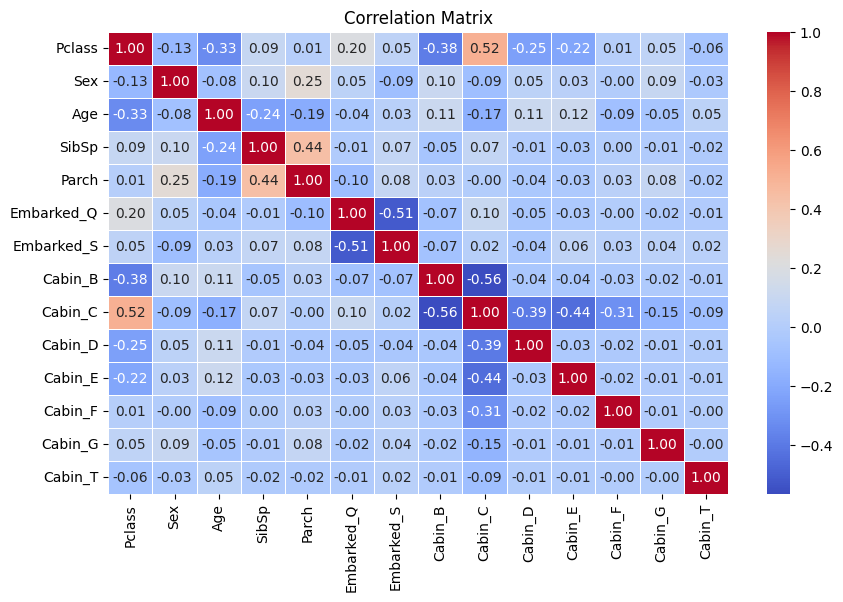

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_train_split is the DataFrame with your features
# Calculate the correlation matrix
correlation_matrix = X_train_split.corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Plotting the Correlation Matrix using a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
##KNN##

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#Features (X) and target (y)
X = train.drop('Survived', axis=1)  # Drop target column
y = train['Survived']  #Target column
#Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
accuracy_scores = []
# Test different values of K (from 1 to 20)
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    accuracy_scores.append(accuracy_score(y_val, y_pred))

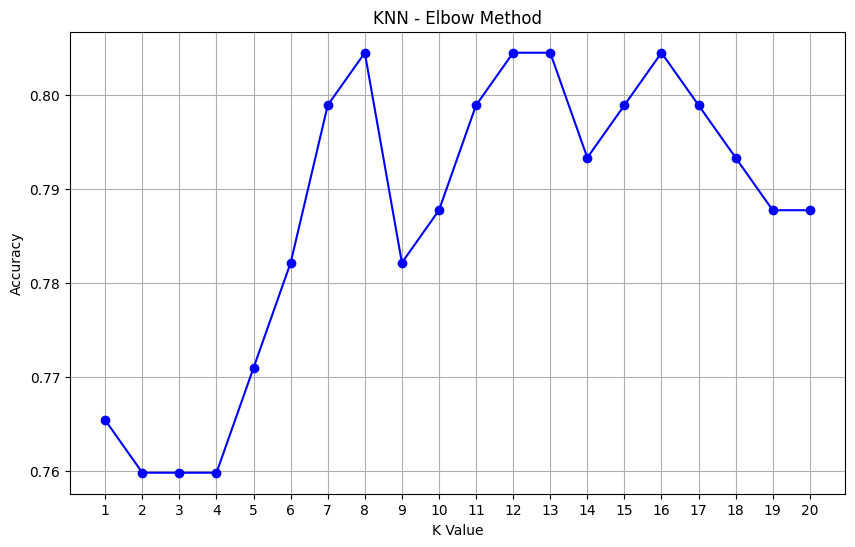

In [ ]:

# Plotting the Elbow method curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN - Elbow Method')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [ ]:
# Let's assume the optimal K is the one with the highest accuracy
optimal_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Optimal K: {optimal_k}")

Optimal K: 8


In [ ]:
# Step 3: Train KNN with the optimal K value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Step 4: Evaluate the KNN model on the validation set
y_pred_optimal = knn_optimal.predict(X_val_scaled)
accuracy_optimal = accuracy_score(y_val, y_pred_optimal)
print(f"Accuracy of KNN model with K={optimal_k}: {accuracy_optimal:.2f}")

Accuracy of KNN model with K=8: 0.80


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Predict on the validation set with the optimal K
y_pred_optimal = knn_optimal.predict(X_val_scaled)
# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred_optimal)
recall = recall_score(y_val, y_pred_optimal)
f1 = f1_score(y_val, y_pred_optimal)
# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_val, y_pred_optimal)
class_report = classification_report(y_val, y_pred_optimal)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Precision: 0.78
Recall: 0.73
F1-Score: 0.76

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
##SVM##

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = train.drop(columns=['Survived'])
y = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train an SVM classifier
svm = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity
svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions
y_pred = svm.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[87 18]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

